In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('./titanic.csv')  # 讀入csv檔，並把資料命名為 'data'
data.head(10) # show出前10筆資料

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


assengerId — 乘客編號
Survived — 是否生還（0=否，1=是；只有訓練集有）
Pclass — 艙等（1, 2, 3）
Name — 姓名
Sex — 性別（male, female）
Age — 年齡
SibSp — 手足及配偶人數
Parch — 父母及子女人數
Ticket — 船票號碼
Fare — 船票價格
Cabin — 艙房號碼
Embarked — 出發港口（C = Cherbourg, Q = Queenstown, S = Southampton）

0 0 0
0 1 1
0 2 2
1 0 3
1 1 4


<Figure size 640x480 with 0 Axes>

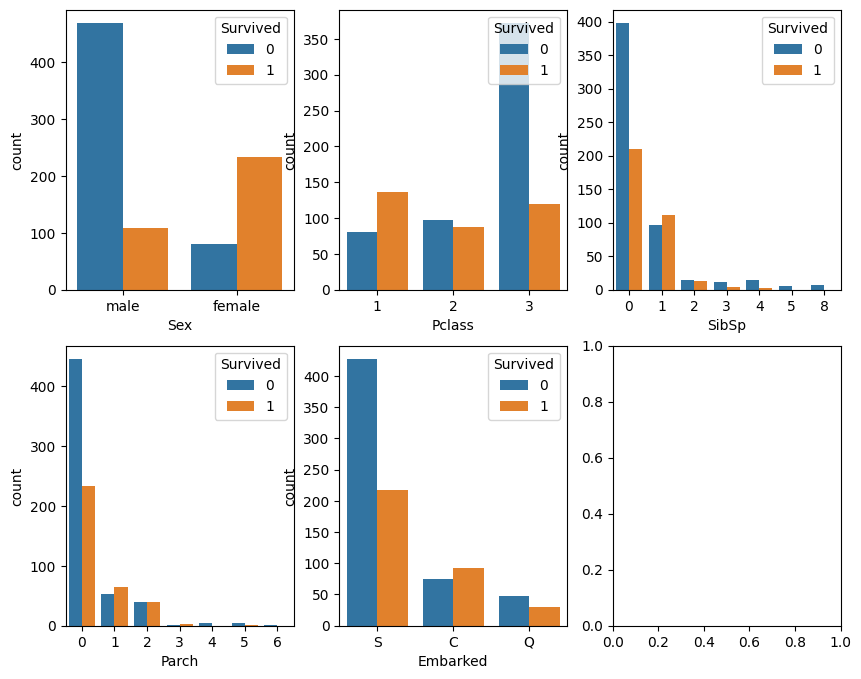

In [8]:
cols= ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'] #使用圖表觀察'性別'、'艙等'、'碼頭'等欄位與生還相關性
n_row = 2
n_col = 3

plt.tight_layout()
fig, ax = plt.subplots(n_row, n_col, figsize=(10,8))
for r in range(0, n_row):
    for c in range(0, n_col):
        i = r * n_col + c
        if i < 5:
            print(r,c,i)
            axs = ax[r, c]
            sns.countplot(x=data[cols[i]], hue=data['Survived'], ax=axs)
#            axs.set_title(cols[i])
            axs.legend(title='Survived', loc = 'upper right')
plt.show()

Name欄位

In [9]:
print( data['Name'].head(20))

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [11]:
data['Title'] =  data['Name'].apply(  # 將 'Name' 欄位中的乘客稱謂（Title）提取出來，並存入新的欄位 'Title'
    lambda x: x.split(',')[1].split('.')[0].strip() 
)
print( data['Title'].value_counts() )  # 顯示 'Title' 欄位中不同稱謂的計數  

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [ ]:
TitleClassfication = {
    "Officer": ["Capt", "Col", "Major", "Dr", "Rev"],
    "Royalty": ["Don", "Sir", "the Countess", "Dona", "Lady"],
    "Mrs": ["Mme", "Ms", "Mrs"],
    "Miss": ["Mlle", "Miss"],
    "Mr": ["Mr"],
    "Master": ["Master", "Jonkheer"]}

TitleMap = {}
for title in TitleClassfication.keys():
    TitleMap.update(dict.fromkeys(TitleClassfication[title], title))

data['Title'] = data['Title'].map(TitleMap) #映射到TitleMap
print( data['Title'].value_counts() ) #濃縮成6種稱謂